<a href="https://colab.research.google.com/github/nguyenanhtienabcd/M03_PROJECT_SENTIMENT_TEXT/blob/feature%2Fsentiment_text/M03_Project_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. install library

In [11]:
!pip install bs4
!pip install contractions

In [12]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import contractions

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2. preprocess data

In [31]:
# create a set of stopword
stop_words = set(stopwords.words('english'))

In [32]:
#tạo một hàm có chuyển đôi các từ viết tắt thành các từ thông thường
def expand_contractions(text):
    return contractions.fix(text)

In [33]:
def preprocess_text(text):
  wl = WordNetLemmatizer() # đưa các động từ, tính từ về dạnh từ gốc
  soup = BeautifulSoup(text, 'html.parser') # loại bỏ thẻ HTML
  text = soup.get_text() # lấy nội dung văn bản sau khi loại bỏ thẻ HTML
  text = expand_contractions(text) # chuyển đổi các từ viết tắt thành các từ thông thường
  # loại bỏ các kí tự và các hình ký tự trong văn bản
  emoji_clean = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
    u"\U00002702-\U000027B0"  # other symbols
    u"\U000024C2-\U0001F251"  # enclosed characters
    "]+", flags=re.UNICODE
  )
  text = emoji_clean.sub(r'', text)
  text = re.sub(r'http\S+', '', text) # loại bỏ các URL
  text = re.sub(r'\.(?=\S)', '. ', text) # thêm space vào sau dấu chấm
  # loại bỏ tất cả các dấu câu và chuyển các chữ thành chữ thường
  text = "".join(
      [word.lower() for word in text if word not in string.punctuation])

  # loại bỏ tất cả
  text = " ".join(
      wl.lemmatize(word) for word in text.split ()
      if word not in stop_words and word.isalpha())
  return text

In [34]:
!gdown 1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s

Downloading...
From: https://drive.google.com/uc?id=1nxR07ebVNc5bSgfTQjeUcAoyoaNuuH6s
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:01<00:00, 36.5MB/s]


In [35]:
df = pd.read_csv('/content/IMDB-Dataset.csv')
df = df.drop_duplicates()

In [36]:
df['review'] = df['review'].apply(preprocess_text)
df

<ipython-input-33-d39f286c925b>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser') # loại bỏ thẻ HTML


,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job creative original...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,going disagree previous comment side maltin on...,negative


## 3. data visualization

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# create a fucntion to show data and percentage in the chart
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [39]:
fre_pos = len(df[df['sentiment']== 'positive'])
fre_neg = len(df[df['sentiment']== 'negative'])
data = [fre_pos,fre_neg]
labels = ['positive','negative']

([<matplotlib.patches.Wedge at 0x7b68254b88e0>,
 [Text(-0.006496643024372255, 1.1024808586226857, 'positive'),
  Text(0.006496746246079308, -1.1024808580144212, 'negative')],
 [Text(-0.002961054983897558, 0.502491275698775, '50.2%\n(24884)'),
  Text(0.002961102030525943, -0.5024912754215388, '49.8%\n(24698)')])

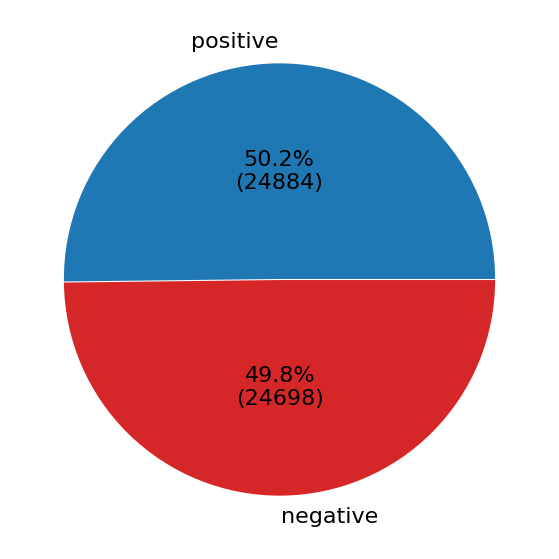

In [40]:
# create chart
pie, ax = plt.subplots(figsize = [11,7])
plt.pie(x = data, autopct = lambda pct: func(pct, data), labels = labels,
        explode =[0.0025]*2, pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})


In [41]:
word_length = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp['word_length'] = word_length
df_temp.head()

,review,sentiment,word_length
0,one reviewer mentioned watching oz episode hoo...,positive,162
1,wonderful little production filming technique ...,positive,84
2,thought wonderful way spend time hot summer we...,positive,84
3,basically family little boy jake think zombie ...,negative,64
4,petter matteis love time money visually stunni...,positive,125


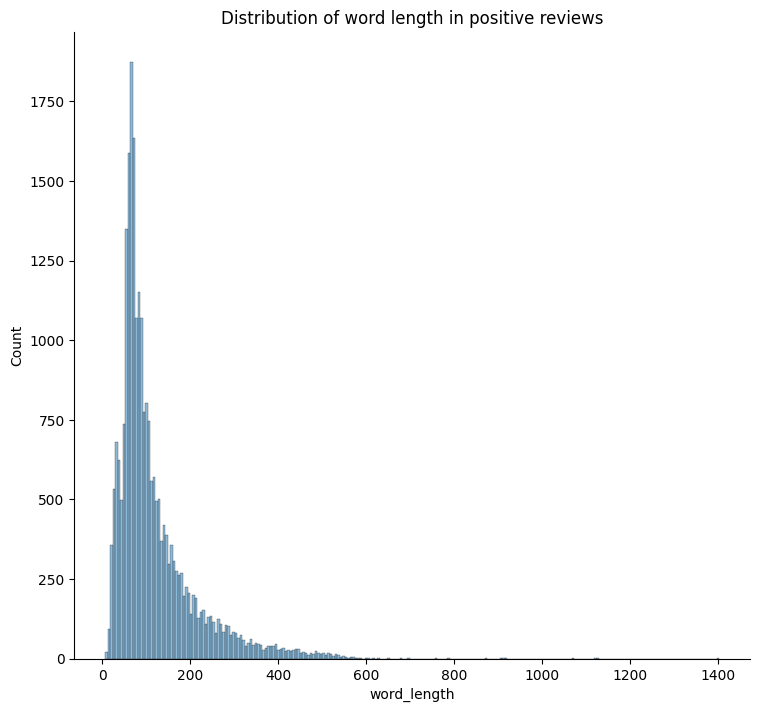

In [42]:
# tạo biểu đồ phân phối lượng từ trong đánh giá tích cực
his_positive = sns.displot(
    data = df_temp[df_temp['sentiment']== 'positive'],
    x = 'word_length', hue = 'sentiment', kde = False, height=7, aspect = 1.1,
    legend = False).set(title = 'Distribution of word length in positive reviews')

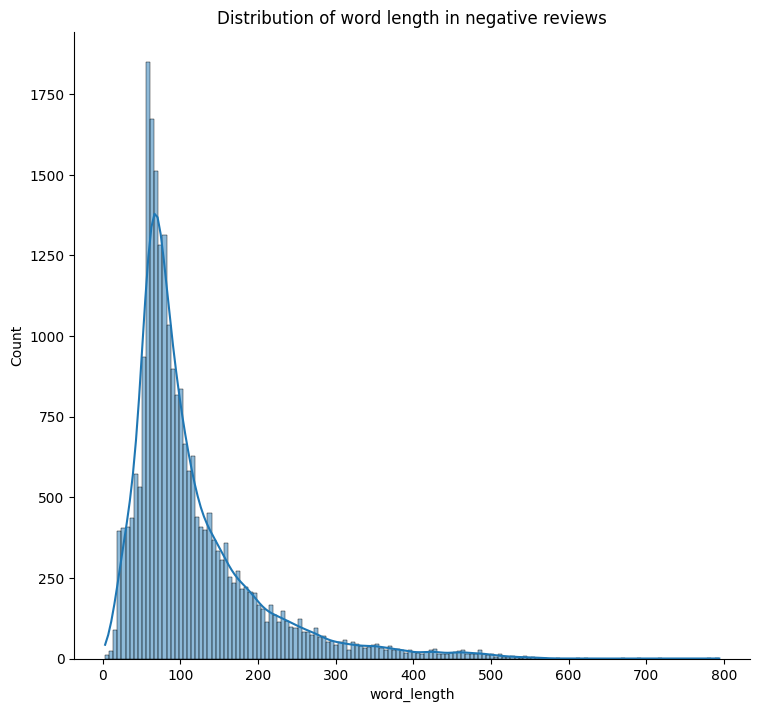

In [43]:
# tạo biểu đồ phân phối lượng từ trong đánh giá tiêu cực
his_negative = sns.displot(
    data = df_temp[df_temp['sentiment']== 'negative'],
    x = 'word_length', hue = 'sentiment', kde = True, height=7, aspect = 1.1,
    legend = False).set(title = 'Distribution of word length in negative reviews')

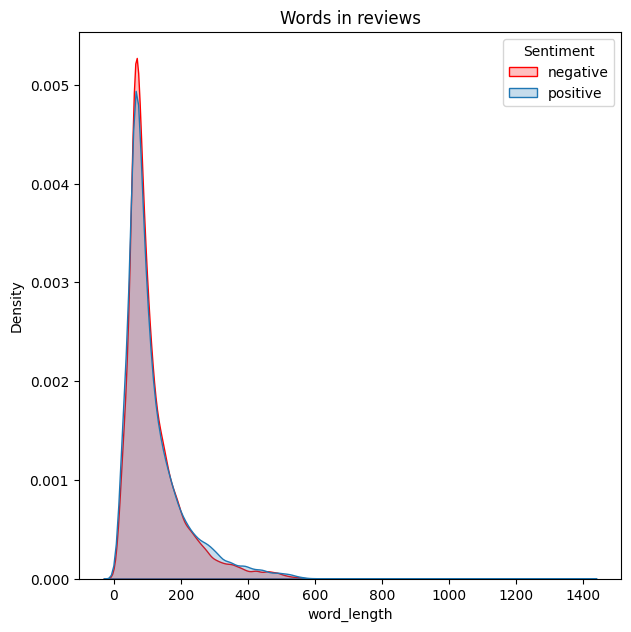

In [44]:
plt.figure(figsize=(7,7.1))
kernel_distibution_number_words_plot = sns.kdeplot(
    data=df_temp, x="word_length", hue="sentiment", fill=True, palette=[sns.color_palette()[0], 'red'] # Changed x to 'word_length'
).set(title='Words in reviews')
plt.legend(title='Sentiment', labels=['negative', 'positive'])
plt.show(kernel_distibution_number_words_plot)

## 4. Tranning data

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [46]:
label_encoder = LabelEncoder()
y_data= label_encoder.fit_transform(df['sentiment'])
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter matteis love time money visually stunni...,positive


In [47]:
# split train data (80%), test data (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], y_data,
    test_size=0.2,
    random_state=42
)

In [48]:
# convert data to vector
# using maximum important words for trainning
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train, y_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
#

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)
dt_classifier.fit(X_train_tfidf, y_train)
y_pred_dt = dt_classifier.predict(X_test_tfidf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)


In [51]:
print(accuracy_dt)

0.7139255823333669


In [52]:
# using randomforest
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf = rf_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [53]:
print(accuracy_rf)

0.8404759503882222


In [ ]:
y_pred_rf = rf_classifier.predict